In [19]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
c = 3*10^8                 # m/s
G = 6.67*10**(-11)         # Nm^2/kg^2
u0 = 4*np.pi*10**(-7)      # N/A^2
eps0 = 8.85*10**(-12)        # C^2/(N*m^2)
e = 1.6*10**(-19)          # C
mp = 1.67*10**(-19)        # kg
me = 9.11*10**(-31)        # kg
Msun = 2*10**(30)          # kg
sigma = 6*10**22           # Hz

class Star:
    def __init__(self, M, w, R, M_frac):
        self.M = M
        self.w = w
        self.R = R
        self.N = M_frac*M/(mp+me)
    def L(self):
        return (2/5)*self.M*self.w*self.R**2

def Bgm(N_Star, R_loc):
    M = -(1/2)*N_Star.L()*np.sqrt(G)/c
    return np.array([2*M*np.sin(R_loc[1])/(R_loc[0])**3, M*np.sin(R_loc[1])/(R_loc[0]**3), 0])

def Generate_Loops(Nl, N_Star):
    Cyl_loops_r = np.arange(.1, N_Star.R +1, N_Star.R/Nl)
    Cyl_loops_z = np.arange(-N_Star.R, N_Star.R + 1,  N_Star.R/Nl)
    #print(Cyl_loops_z)
    Loops = []
    L = 0
    #k = 0
    for r in Cyl_loops_r:
        for z in Cyl_loops_z:
            if r**2 + z**2 <= N_Star.R**2:
                Loops.append([r,z])
    i = 0
    while i < len(Loops):
        k = Loops[i]
        L = L + 2*np.pi*k[0]
        i = i + 1
        #print(L)
    i = 0
    while i < len(Loops):
        Loops[i] = Loops[i]+[N_Star.N/(L)]
        i = i + 1
    #print(Loops)
    return Loops

def J_init(N_Star, loop):
    n = loop[2]
    #print(n)
    R_loc = np.array([loop[0], np.arctan(np.sqrt(loop[0]**2+loop[1]**2))/loop[1],0])
    if R_loc[1] >= 1000:
        R_loc[1] = 0
    i = 0
    v = R_loc[0]*N_Star.w*np.array([0,0,1])
    lc = e*n
    return R_loc, v, lc

def B_em(Loop, Point):
    Bi = 0
    #Q = Loop[0][0]/(np.pi/50)
    Bi = (u0/(4*np.pi*(Point[0] - Loop[0][0])**3))*np.cross(Loop[1], (Point - Loop[0]))    
    Bi = Bi*Loop[2]*Loop[0][0]*2*np.pi
    return Bi

def ElectromagneticBE(N_Star, Nl, deltaT, Point):
    dt = .1
    Nsteps = deltaT/dt
    Loops = Generate_Loops(Nl, N_Star)
    k = 0
    e_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        e_descrip = np.array([R, v, I])
        if R[0] < N_Star.R:
            e_loops.append(e_descrip)
        k = k + 1
    k = 0
    p_loops = []
    while k < len(Loops):
        R, v, I = J_init(N_Star, Loops[k])
        #print(R)
        #print(v)
        p_descrip = np.array([R, v, I])
        p_loops.append(p_descrip)
        k = k + 1
    k = 0
    
    #E = 0
    #while k < len(p_loops):
    #    #print(Loops[k][2])
    #    Ei = p_loops[k][2]*np.array([0,0,1]) - (1/c)*np.cross(p_loops[k][1], Bgm(N_Star, p_loops[k][0]))
    #    E = E + Ei
    #    k = k + 1
    #k = 0
    Bem = 0
    #print(p_loops)
    while k < len(p_loops):
        Bi = B_em(p_loops[k], Point)
        k = k + 1
        Bem = Bem + Bi
    print("Bgm = ", Bgm(N_Star, Point))
    print("Bem = ", Bem)
    #print(Bem[0]/Bgm(N_Star, Point)[0])
    #print(Bem[1]/Bgm(N_Star, Point)[1])
    return (Bem, Bgm(N_Star, Point))

In [49]:
Rs = np.arange(1000, 41000, 1000)
Thetas = np.arange(0,np.pi+np.pi/40, np.pi/40)
X,Y = np.meshgrid(Rs,Thetas)
log10Bsemr = 0*X+Y
log10Bsgmr = 0*X+Y
log10Bsemtheta = 0*X+Y
log10Bsgmtheta = 0*X+Y
log10Br = 0*X+Y
log10Btheta = 0*X+Y
Star_Test = Star(1.4*Msun, 400, 20000, .1)
i = 0
k = 0
for r in Rs:
    for t in Thetas:
        print(r,t)
        Bcoupled = ElectromagneticBE(Star_Test, 80, 1, np.array([r, t, 0]))
        Bemi = Bcoupled[0]
        Bgmi = Bcoupled[1]
        log10Bsemr[i,k] = np.log10(np.abs(Bemi))[0]
        log10Bsgmr[i,k] = np.log10(np.abs(Bgmi))[0]
        log10Bsemtheta[i,k] = np.log10(np.abs(Bemi))[1]
        log10Bsgmtheta[i,k] = np.log10(np.abs(Bgmi))[1]
        log10Br[i,k] = np.log10(np.abs(Bgmi+Bemi))[0]
        log10Btheta[i,k] = np.log10(np.abs(Bemi+Bgmi))[1]
        i = i + 1
    i = 0
    k = 0

1000 0.0


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in double_scalars


Bgm =  [-0. -0.  0.]
Bem =  [-1.00000000e+01  4.09963312e+22  0.00000000e+00]


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


1000 0.07853981633974483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-8.11683562e+18  4.09963312e+22  0.00000000e+00]
1000 0.15707963267948966
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-1.62336712e+19  4.09963312e+22  0.00000000e+00]
1000 0.23561944901923448
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-2.43505069e+19  4.09963312e+22  0.00000000e+00]
1000 0.3141592653589793
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-3.24673425e+19  4.09963312e+22  0.00000000e+00]
1000 0.39269908169872414
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-4.05841781e+19  4.09963312e+22  0.00000000e+00]
1000 0.47123889803846897
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-4.87010137e+19  4.09963312e+22  0.00000000e+00]
1000 0.5497787143782138
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-5.68178493e+19  4.09963312e+22  0.00000000e+00]
1000 0.6283185307179586
Bgm =  [

Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-1.62336712e+20  4.09963312e+22  0.00000000e+00]
2000 1.6493361431346414
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.70453548e+20  4.09963312e+22  0.00000000e+00]
2000 1.7278759594743862
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.78570384e+20  4.09963312e+22  0.00000000e+00]
2000 1.806415775814131
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.86687219e+20  4.09963312e+22  0.00000000e+00]
2000 1.8849555921538759
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.94804055e+20  4.09963312e+22  0.00000000e+00]
2000 1.9634954084936207
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-2.02920891e+20  4.09963312e+22  0.00000000e+00]
2000 2.0420352248333655
Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-2.11037726e+20  4.09963312e+22  0.00000000e+00]
2000 2.1205750411731104
Bgm =  [-7.09012743e+21 -3.54506372e+2

3000 3.0630528372500483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-3.16556589e+20  4.09963312e+22  0.00000000e+00]
3000 3.141592653589793
Bgm =  [-1018354.77987274  -509177.38993637        0.        ]
Bem =  [-3.24673425e+20  4.09963312e+22  0.00000000e+00]
4000 0.0
Bgm =  [-0. -0.  0.]
Bem =  [-1.00000000e+01  4.09963312e+22  0.00000000e+00]
4000 0.07853981633974483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-8.11683562e+18  4.09963312e+22  0.00000000e+00]
4000 0.15707963267948966
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-1.62336712e+19  4.09963312e+22  0.00000000e+00]
4000 0.23561944901923448
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-2.43505069e+19  4.09963312e+22  0.00000000e+00]
4000 0.3141592653589793
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-3.24673425e+19  4.09963312e+22  0.00000000e+00]
4000 0.39269908169872414
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
B

5000 1.413716694115407
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.46103041e+20  4.09963312e+22  0.00000000e+00]
5000 1.4922565104551517
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.54219877e+20  4.09963312e+22  0.00000000e+00]
5000 1.5707963267948966
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-1.62336712e+20  4.09963312e+22  0.00000000e+00]
5000 1.6493361431346414
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.70453548e+20  4.09963312e+22  0.00000000e+00]
5000 1.7278759594743862
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.78570384e+20  4.09963312e+22  0.00000000e+00]
5000 1.806415775814131
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.86687219e+20  4.09963312e+22  0.00000000e+00]
5000 1.8849555921538759
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.94804055e+20  4.09963312e+22  0.00000000e+00]
5000 1.9634954084936207
Bgm =  [-7.6825

6000 2.9059732045705586
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-3.00322918e+20  4.09963312e+22  0.00000000e+00]
6000 2.9845130209103035
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-3.08439754e+20  4.09963312e+22  0.00000000e+00]
6000 3.0630528372500483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-3.16556589e+20  4.09963312e+22  0.00000000e+00]
6000 3.141592653589793
Bgm =  [-1018354.77987274  -509177.38993637        0.        ]
Bem =  [-3.24673425e+20  4.09963312e+22  0.00000000e+00]
7000 0.0
Bgm =  [-0. -0.  0.]
Bem =  [-1.00000000e+01  4.09963312e+22  0.00000000e+00]
7000 0.07853981633974483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-8.11683562e+18  4.09963312e+22  0.00000000e+00]
7000 0.15707963267948966
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-1.62336712e+19  4.09963312e+22  0.00000000e+00]
7000 0.23561944901923448
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Be

Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-1.21752534e+20  4.09963312e+22  0.00000000e+00]
8000 1.2566370614359172
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.29869370e+20  4.09963312e+22  0.00000000e+00]
8000 1.335176877775662
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.37986206e+20  4.09963312e+22  0.00000000e+00]
8000 1.413716694115407
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.46103041e+20  4.09963312e+22  0.00000000e+00]
8000 1.4922565104551517
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.54219877e+20  4.09963312e+22  0.00000000e+00]
8000 1.5707963267948966
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-1.62336712e+20  4.09963312e+22  0.00000000e+00]
8000 1.6493361431346414
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.70453548e+20  4.09963312e+22  0.00000000e+00]
8000 1.7278759594743862
Bgm =  [-8.21312025e+21 -4.10656013e+21

Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-2.84089247e+20  4.09963312e+22  0.00000000e+00]
9000 2.827433388230814
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-2.92206082e+20  4.09963312e+22  0.00000000e+00]
9000 2.9059732045705586
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-3.00322918e+20  4.09963312e+22  0.00000000e+00]
9000 2.9845130209103035
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-3.08439754e+20  4.09963312e+22  0.00000000e+00]
9000 3.0630528372500483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-3.16556589e+20  4.09963312e+22  0.00000000e+00]
9000 3.141592653589793
Bgm =  [-1018354.77987274  -509177.38993637        0.        ]
Bem =  [-3.24673425e+20  4.09963312e+22  0.00000000e+00]
10000 0.0
Bgm =  [-0. -0.  0.]
Bem =  [-1.00000000e+01  4.09963312e+22  0.00000000e+00]
10000 0.07853981633974483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-8.11683562e+18  4.

Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-1.05518863e+20  4.09963312e+22  0.00000000e+00]
11000 1.0995574287564276
Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-1.13635699e+20  4.09963312e+22  0.00000000e+00]
11000 1.1780972450961724
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-1.21752534e+20  4.09963312e+22  0.00000000e+00]
11000 1.2566370614359172
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.29869370e+20  4.09963312e+22  0.00000000e+00]
11000 1.335176877775662
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.37986206e+20  4.09963312e+22  0.00000000e+00]
11000 1.413716694115407
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.46103041e+20  4.09963312e+22  0.00000000e+00]
11000 1.4922565104551517
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.54219877e+20  4.09963312e+22  0.00000000e+00]
11000 1.5707963267948966
Bgm =  [-8.31549783e+21 -4.15774

Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-2.59738740e+20  4.09963312e+22  0.00000000e+00]
12000 2.5918139392115793
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-2.67855575e+20  4.09963312e+22  0.00000000e+00]
12000 2.670353755551324
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-2.75972411e+20  4.09963312e+22  0.00000000e+00]
12000 2.748893571891069
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-2.84089247e+20  4.09963312e+22  0.00000000e+00]
12000 2.827433388230814
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-2.92206082e+20  4.09963312e+22  0.00000000e+00]
12000 2.9059732045705586
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-3.00322918e+20  4.09963312e+22  0.00000000e+00]
12000 2.9845130209103035
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-3.08439754e+20  4.09963312e+22  0.00000000e+00]
12000 3.0630528372500483
Bgm =  [-6.5242644e+20 -3.2621

14000 0.7853981633974483
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-8.11683562e+19  4.09963312e+22  0.00000000e+00]
14000 0.8639379797371931
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-8.92851918e+19  4.09963312e+22  0.00000000e+00]
14000 0.9424777960769379
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-9.74020275e+19  4.09963312e+22  0.00000000e+00]
14000 1.0210176124166828
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-1.05518863e+20  4.09963312e+22  0.00000000e+00]
14000 1.0995574287564276
Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-1.13635699e+20  4.09963312e+22  0.00000000e+00]
14000 1.1780972450961724
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-1.21752534e+20  4.09963312e+22  0.00000000e+00]
14000 1.2566370614359172
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.29869370e+20  4.09963312e+22  0.00000000e+00]
14000 1.335176877775662
Bgm = 

15000 2.2776546738526
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-2.35388233e+20  4.09963312e+22  0.00000000e+00]
15000 2.356194490192345
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-2.43505069e+20  4.09963312e+22  0.00000000e+00]
15000 2.4347343065320897
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-2.51621904e+20  4.09963312e+22  0.00000000e+00]
15000 2.5132741228718345
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-2.59738740e+20  4.09963312e+22  0.00000000e+00]
15000 2.5918139392115793
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-2.67855575e+20  4.09963312e+22  0.00000000e+00]
15000 2.670353755551324
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-2.75972411e+20  4.09963312e+22  0.00000000e+00]
15000 2.748893571891069
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-2.84089247e+20  4.09963312e+22  0.00000000e+00]
15000 2.827433388230814
Bgm =  [-

Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-5.68178493e+19  4.09963312e+22  0.00000000e+00]
17000 0.6283185307179586
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-6.49346850e+19  4.09963312e+22  0.00000000e+00]
17000 0.7068583470577035
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-7.30515206e+19  4.09963312e+22  0.00000000e+00]
17000 0.7853981633974483
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-8.11683562e+19  4.09963312e+22  0.00000000e+00]
17000 0.8639379797371931
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-8.92851918e+19  4.09963312e+22  0.00000000e+00]
17000 0.9424777960769379
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-9.74020275e+19  4.09963312e+22  0.00000000e+00]
17000 1.0210176124166828
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-1.05518863e+20  4.09963312e+22  0.00000000e+00]
17000 1.0995574287564276
Bgm =  [-7.40916282e+21 -3.

Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-2.11037726e+20  4.09963312e+22  0.00000000e+00]
18000 2.1205750411731104
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-2.19154562e+20  4.09963312e+22  0.00000000e+00]
18000 2.199114857512855
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-2.27271397e+20  4.09963312e+22  0.00000000e+00]
18000 2.2776546738526
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-2.35388233e+20  4.09963312e+22  0.00000000e+00]
18000 2.356194490192345
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-2.43505069e+20  4.09963312e+22  0.00000000e+00]
18000 2.4347343065320897
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-2.51621904e+20  4.09963312e+22  0.00000000e+00]
18000 2.5132741228718345
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-2.59738740e+20  4.09963312e+22  0.00000000e+00]
18000 2.5918139392115793
Bgm =  [-4.34483568e+21 -2.17241

Bem =  [-2.43505069e+19  4.09963312e+22  0.00000000e+00]
20000 0.3141592653589793
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-3.24673425e+19  4.09963312e+22  0.00000000e+00]
20000 0.39269908169872414
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-4.05841781e+19  4.09963312e+22  0.00000000e+00]
20000 0.47123889803846897
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-4.87010137e+19  4.09963312e+22  0.00000000e+00]
20000 0.5497787143782138
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-5.68178493e+19  4.09963312e+22  0.00000000e+00]
20000 0.6283185307179586
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-6.49346850e+19  4.09963312e+22  0.00000000e+00]
20000 0.7068583470577035
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-7.30515206e+19  4.09963312e+22  0.00000000e+00]
20000 0.7853981633974483
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-8.11683562e+19  

Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.78570384e+20  4.09963312e+22  0.00000000e+00]
21000 1.806415775814131
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.86687219e+20  4.09963312e+22  0.00000000e+00]
21000 1.8849555921538759
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.94804055e+20  4.09963312e+22  0.00000000e+00]
21000 1.9634954084936207
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-2.02920891e+20  4.09963312e+22  0.00000000e+00]
21000 2.0420352248333655
Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-2.11037726e+20  4.09963312e+22  0.00000000e+00]
21000 2.1205750411731104
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-2.19154562e+20  4.09963312e+22  0.00000000e+00]
21000 2.199114857512855
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-2.27271397e+20  4.09963312e+22  0.00000000e+00]
21000 2.2776546738526
Bgm =  [-6.32315416e+21 -3.16157708

Bgm =  [-0. -0.  0.]
Bem =  [-1.00000000e+01  4.09963312e+22  0.00000000e+00]
23000 0.07853981633974483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-8.11683562e+18  4.09963312e+22  0.00000000e+00]
23000 0.15707963267948966
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-1.62336712e+19  4.09963312e+22  0.00000000e+00]
23000 0.23561944901923448
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-2.43505069e+19  4.09963312e+22  0.00000000e+00]
23000 0.3141592653589793
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-3.24673425e+19  4.09963312e+22  0.00000000e+00]
23000 0.39269908169872414
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-4.05841781e+19  4.09963312e+22  0.00000000e+00]
23000 0.47123889803846897
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-4.87010137e+19  4.09963312e+22  0.00000000e+00]
23000 0.5497787143782138
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem 

Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.54219877e+20  4.09963312e+22  0.00000000e+00]
24000 1.5707963267948966
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-1.62336712e+20  4.09963312e+22  0.00000000e+00]
24000 1.6493361431346414
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.70453548e+20  4.09963312e+22  0.00000000e+00]
24000 1.7278759594743862
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.78570384e+20  4.09963312e+22  0.00000000e+00]
24000 1.806415775814131
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.86687219e+20  4.09963312e+22  0.00000000e+00]
24000 1.8849555921538759
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.94804055e+20  4.09963312e+22  0.00000000e+00]
24000 1.9634954084936207
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-2.02920891e+20  4.09963312e+22  0.00000000e+00]
24000 2.0420352248333655
Bgm =  [-7.40916282e+21 -3.7045

Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-3.08439754e+20  4.09963312e+22  0.00000000e+00]
25000 3.0630528372500483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-3.16556589e+20  4.09963312e+22  0.00000000e+00]
25000 3.141592653589793
Bgm =  [-1018354.77987274  -509177.38993637        0.        ]
Bem =  [-3.24673425e+20  4.09963312e+22  0.00000000e+00]
26000 0.0
Bgm =  [-0. -0.  0.]
Bem =  [-1.00000000e+01  4.09963312e+22  0.00000000e+00]
26000 0.07853981633974483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-8.11683562e+18  4.09963312e+22  0.00000000e+00]
26000 0.15707963267948966
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-1.62336712e+19  4.09963312e+22  0.00000000e+00]
26000 0.23561944901923448
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-2.43505069e+19  4.09963312e+22  0.00000000e+00]
26000 0.3141592653589793
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-3.24673425

Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.29869370e+20  4.09963312e+22  0.00000000e+00]
27000 1.335176877775662
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.37986206e+20  4.09963312e+22  0.00000000e+00]
27000 1.413716694115407
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.46103041e+20  4.09963312e+22  0.00000000e+00]
27000 1.4922565104551517
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.54219877e+20  4.09963312e+22  0.00000000e+00]
27000 1.5707963267948966
Bgm =  [-8.31549783e+21 -4.15774891e+21  0.00000000e+00]
Bem =  [-1.62336712e+20  4.09963312e+22  0.00000000e+00]
27000 1.6493361431346414
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.70453548e+20  4.09963312e+22  0.00000000e+00]
27000 1.7278759594743862
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.78570384e+20  4.09963312e+22  0.00000000e+00]
27000 1.806415775814131
Bgm =  [-8.08573996e+21 -4.042869

Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-2.84089247e+20  4.09963312e+22  0.00000000e+00]
28000 2.827433388230814
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-2.92206082e+20  4.09963312e+22  0.00000000e+00]
28000 2.9059732045705586
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-3.00322918e+20  4.09963312e+22  0.00000000e+00]
28000 2.9845130209103035
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-3.08439754e+20  4.09963312e+22  0.00000000e+00]
28000 3.0630528372500483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-3.16556589e+20  4.09963312e+22  0.00000000e+00]
28000 3.141592653589793
Bgm =  [-1018354.77987274  -509177.38993637        0.        ]
Bem =  [-3.24673425e+20  4.09963312e+22  0.00000000e+00]
29000 0.0
Bgm =  [-0. -0.  0.]
Bem =  [-1.00000000e+01  4.09963312e+22  0.00000000e+00]
29000 0.07853981633974483
Bgm =  [-6.5242644e+20 -3.2621322e+20  0.0000000e+00]
Bem =  [-8.11683562e+1

Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-1.05518863e+20  4.09963312e+22  0.00000000e+00]
30000 1.0995574287564276
Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-1.13635699e+20  4.09963312e+22  0.00000000e+00]
30000 1.1780972450961724
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-1.21752534e+20  4.09963312e+22  0.00000000e+00]
30000 1.2566370614359172
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.29869370e+20  4.09963312e+22  0.00000000e+00]
30000 1.335176877775662
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.37986206e+20  4.09963312e+22  0.00000000e+00]
30000 1.413716694115407
Bgm =  [-8.21312025e+21 -4.10656013e+21  0.00000000e+00]
Bem =  [-1.46103041e+20  4.09963312e+22  0.00000000e+00]
30000 1.4922565104551517
Bgm =  [-8.28986392e+21 -4.14493196e+21  0.00000000e+00]
Bem =  [-1.54219877e+20  4.09963312e+22  0.00000000e+00]
30000 1.5707963267948966
Bgm =  [-8.31549783e+21 -4.15774

Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-2.59738740e+20  4.09963312e+22  0.00000000e+00]
31000 2.5918139392115793
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-2.67855575e+20  4.09963312e+22  0.00000000e+00]
31000 2.670353755551324
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-2.75972411e+20  4.09963312e+22  0.00000000e+00]
31000 2.748893571891069
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-2.84089247e+20  4.09963312e+22  0.00000000e+00]
31000 2.827433388230814
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-2.92206082e+20  4.09963312e+22  0.00000000e+00]
31000 2.9059732045705586
Bgm =  [-1.94121442e+21 -9.70607208e+20  0.00000000e+00]
Bem =  [-3.00322918e+20  4.09963312e+22  0.00000000e+00]
31000 2.9845130209103035
Bgm =  [-1.30083045e+21 -6.50415227e+20  0.00000000e+00]
Bem =  [-3.08439754e+20  4.09963312e+22  0.00000000e+00]
31000 3.0630528372500483
Bgm =  [-6.5242644e+20 -3.2621

Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-8.11683562e+19  4.09963312e+22  0.00000000e+00]
33000 0.8639379797371931
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-8.92851918e+19  4.09963312e+22  0.00000000e+00]
33000 0.9424777960769379
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-9.74020275e+19  4.09963312e+22  0.00000000e+00]
33000 1.0210176124166828
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-1.05518863e+20  4.09963312e+22  0.00000000e+00]
33000 1.0995574287564276
Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-1.13635699e+20  4.09963312e+22  0.00000000e+00]
33000 1.1780972450961724
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-1.21752534e+20  4.09963312e+22  0.00000000e+00]
33000 1.2566370614359172
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.29869370e+20  4.09963312e+22  0.00000000e+00]
33000 1.335176877775662
Bgm =  [-8.08573996e+21 -4.0428

Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-2.35388233e+20  4.09963312e+22  0.00000000e+00]
34000 2.356194490192345
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-2.43505069e+20  4.09963312e+22  0.00000000e+00]
34000 2.4347343065320897
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-2.51621904e+20  4.09963312e+22  0.00000000e+00]
34000 2.5132741228718345
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-2.59738740e+20  4.09963312e+22  0.00000000e+00]
34000 2.5918139392115793
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-2.67855575e+20  4.09963312e+22  0.00000000e+00]
34000 2.670353755551324
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-2.75972411e+20  4.09963312e+22  0.00000000e+00]
34000 2.748893571891069
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-2.84089247e+20  4.09963312e+22  0.00000000e+00]
34000 2.827433388230814
Bgm =  [-2.56963015e+21 -1.2848

Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-5.68178493e+19  4.09963312e+22  0.00000000e+00]
36000 0.6283185307179586
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-6.49346850e+19  4.09963312e+22  0.00000000e+00]
36000 0.7068583470577035
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-7.30515206e+19  4.09963312e+22  0.00000000e+00]
36000 0.7853981633974483
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-8.11683562e+19  4.09963312e+22  0.00000000e+00]
36000 0.8639379797371931
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-8.92851918e+19  4.09963312e+22  0.00000000e+00]
36000 0.9424777960769379
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-9.74020275e+19  4.09963312e+22  0.00000000e+00]
36000 1.0210176124166828
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-1.05518863e+20  4.09963312e+22  0.00000000e+00]
36000 1.0995574287564276
Bgm =  [-7.40916282e+21 -3.

Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-2.11037726e+20  4.09963312e+22  0.00000000e+00]
37000 2.1205750411731104
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-2.19154562e+20  4.09963312e+22  0.00000000e+00]
37000 2.199114857512855
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-2.27271397e+20  4.09963312e+22  0.00000000e+00]
37000 2.2776546738526
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-2.35388233e+20  4.09963312e+22  0.00000000e+00]
37000 2.356194490192345
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-2.43505069e+20  4.09963312e+22  0.00000000e+00]
37000 2.4347343065320897
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-2.51621904e+20  4.09963312e+22  0.00000000e+00]
37000 2.5132741228718345
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-2.59738740e+20  4.09963312e+22  0.00000000e+00]
37000 2.5918139392115793
Bgm =  [-4.34483568e+21 -2.17241

39000 0.3141592653589793
Bgm =  [-2.56963015e+21 -1.28481507e+21  0.00000000e+00]
Bem =  [-3.24673425e+19  4.09963312e+22  0.00000000e+00]
39000 0.39269908169872414
Bgm =  [-3.18220325e+21 -1.59110163e+21  0.00000000e+00]
Bem =  [-4.05841781e+19  4.09963312e+22  0.00000000e+00]
39000 0.47123889803846897
Bgm =  [-3.77515701e+21 -1.88757851e+21  0.00000000e+00]
Bem =  [-4.87010137e+19  4.09963312e+22  0.00000000e+00]
39000 0.5497787143782138
Bgm =  [-4.34483568e+21 -2.17241784e+21  0.00000000e+00]
Bem =  [-5.68178493e+19  4.09963312e+22  0.00000000e+00]
39000 0.6283185307179586
Bgm =  [-4.88772699e+21 -2.44386349e+21  0.00000000e+00]
Bem =  [-6.49346850e+19  4.09963312e+22  0.00000000e+00]
39000 0.7068583470577035
Bgm =  [-5.40048384e+21 -2.70024192e+21  0.00000000e+00]
Bem =  [-7.30515206e+19  4.09963312e+22  0.00000000e+00]
39000 0.7853981633974483
Bgm =  [-5.87994490e+21 -2.93997245e+21  0.00000000e+00]
Bem =  [-8.11683562e+19  4.09963312e+22  0.00000000e+00]
39000 0.8639379797371931


40000 1.806415775814131
Bgm =  [-8.08573996e+21 -4.04286998e+21  0.00000000e+00]
Bem =  [-1.86687219e+20  4.09963312e+22  0.00000000e+00]
40000 1.8849555921538759
Bgm =  [-7.9085084e+21 -3.9542542e+21  0.0000000e+00]
Bem =  [-1.94804055e+20  4.09963312e+22  0.00000000e+00]
40000 1.9634954084936207
Bgm =  [-7.68251825e+21 -3.84125912e+21  0.00000000e+00]
Bem =  [-2.02920891e+20  4.09963312e+22  0.00000000e+00]
40000 2.0420352248333655
Bgm =  [-7.40916282e+21 -3.70458141e+21  0.00000000e+00]
Bem =  [-2.11037726e+20  4.09963312e+22  0.00000000e+00]
40000 2.1205750411731104
Bgm =  [-7.09012743e+21 -3.54506372e+21  0.00000000e+00]
Bem =  [-2.19154562e+20  4.09963312e+22  0.00000000e+00]
40000 2.199114857512855
Bgm =  [-6.72737906e+21 -3.36368953e+21  0.00000000e+00]
Bem =  [-2.27271397e+20  4.09963312e+22  0.00000000e+00]
40000 2.2776546738526
Bgm =  [-6.32315416e+21 -3.16157708e+21  0.00000000e+00]
Bem =  [-2.35388233e+20  4.09963312e+22  0.00000000e+00]
40000 2.356194490192345
Bgm =  [-5.

No handles with labels found to put in legend.


Text(0.5,0,'log($|B_r|$)')

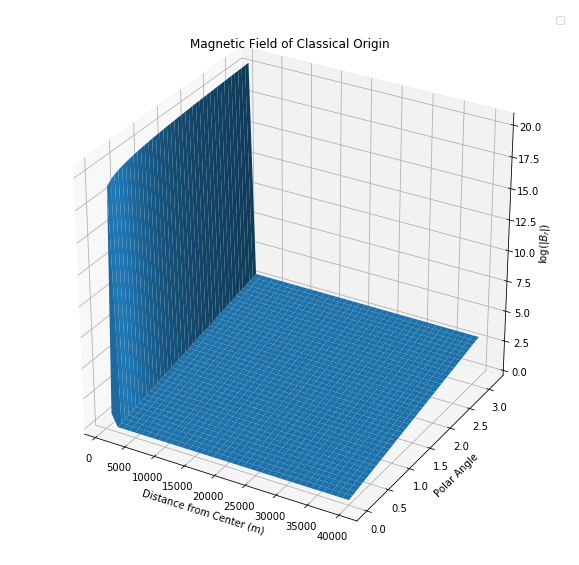

In [82]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.legend()
ax.plot_surface(X, Y, log10Bsemr)
ax.set_xlabel("Distance from Center (m)")
ax.set_title("Magnetic Field of Classical Origin")
ax.set_ylabel("Polar Angle")
ax.set_zlabel("log($|B_r|$)")

Text(0.5,0,'log($|B_{\\phi}|$)')

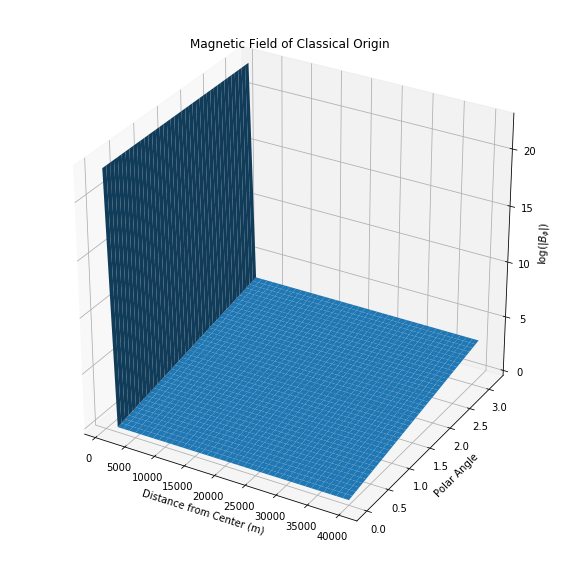

In [85]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, log10Bsemtheta)
ax.set_xlabel("Distance from Center (m)")
ax.set_title("Magnetic Field of Classical Origin")
ax.set_ylabel("Polar Angle")
ax.set_zlabel("log($|B_{\phi}|$)")

Text(0.5,0,'log($|B_r|$)')

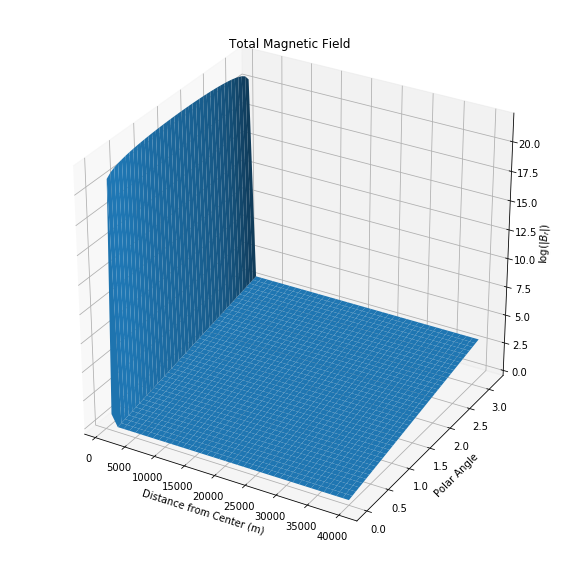

In [86]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, log10Br)
ax.set_xlabel("Distance from Center (m)")
ax.set_title("Total Magnetic Field")
ax.set_ylabel("Polar Angle")
ax.set_zlabel("log($|B_r|$)")

Text(0.5,0,'log($|B_{/phi}|$)')

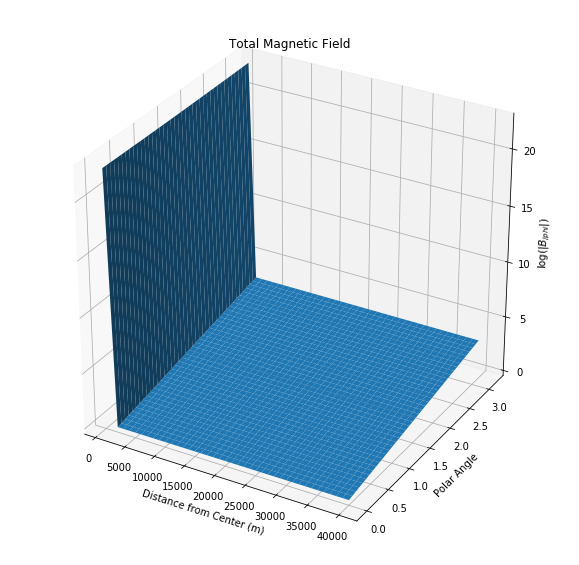

In [87]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, log10Btheta)
ax.set_xlabel("Distance from Center (m)")
ax.set_title("Total Magnetic Field")
ax.set_ylabel("Polar Angle")
ax.set_zlabel("log($|B_{/phi}|$)")

In [113]:
Rs = np.arange(1, 4100, 200)
Thetas = np.arange(0,np.pi+np.pi/40, np.pi/40)
X,Y = np.meshgrid(Rs,Thetas)
log10Bsemr = 0*X+Y
log10Bsgmr = 0*X+Y
log10Bsemtheta = 0*X+Y
log10Bsgmtheta = 0*X+Y
log10Br = 0*X+Y
log10Btheta = 0*X+Y
Star_Test = Star(1.4*Msun, 1000, 20000, .002)
i = 0
k = 0
for r in Rs:
    for t in Thetas:
        print(r,t)
        Bcoupled = ElectromagneticBE(Star_Test, 80, 1, np.array([r, t, 0]))
        Bemi = Bcoupled[0]
        Bgmi = Bcoupled[1]
        log10Bsemr[i,k] = np.log10(np.abs(Bemi))[0]
        log10Bsgmr[i,k] = np.log10(np.abs(Bgmi))[0]
        log10Bsemtheta[i,k] = np.log10(np.abs(Bemi))[1]
        log10Bsgmtheta[i,k] = np.log10(np.abs(Bgmi))[1]
        log10Br[i,k] = np.log10(np.abs(Bgmi+Bemi))[0]
        log10Btheta[i,k] = np.log10(np.abs(Bemi+Bgmi))[1]
        i = i + 1
    i = 0
    k = 0

1 0.0


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in double_scalars


Bgm =  [-0. -0.  0.]
Bem =  [1.20699406e-04 6.27972985e+19 0.00000000e+00]
1 0.07853981633974483


C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
C:\Users\Grant\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10


Bgm =  [-1.30485288e+34 -6.52426440e+33  0.00000000e+00]
Bem =  [3.95338755e+14 6.27972985e+19 0.00000000e+00]
1 0.15707963267948966
Bgm =  [-2.60166091e+34 -1.30083045e+34  0.00000000e+00]
Bem =  [7.90677511e+14 6.27972985e+19 0.00000000e+00]
1 0.23561944901923448
Bgm =  [-3.88242883e+34 -1.94121442e+34  0.00000000e+00]
Bem =  [1.18601627e+15 6.27972985e+19 0.00000000e+00]
1 0.3141592653589793
Bgm =  [-5.13926029e+34 -2.56963015e+34  0.00000000e+00]
Bem =  [1.58135502e+15 6.27972985e+19 0.00000000e+00]
1 0.39269908169872414
Bgm =  [-6.36440650e+34 -3.18220325e+34  0.00000000e+00]
Bem =  [1.97669378e+15 6.27972985e+19 0.00000000e+00]
1 0.47123889803846897
Bgm =  [-7.55031403e+34 -3.77515701e+34  0.00000000e+00]
Bem =  [2.37203253e+15 6.27972985e+19 0.00000000e+00]
1 0.5497787143782138
Bgm =  [-8.68967136e+34 -4.34483568e+34  0.00000000e+00]
Bem =  [2.76737129e+15 6.27972985e+19 0.00000000e+00]
1 0.6283185307179586
Bgm =  [-9.77545398e+34 -4.88772699e+34  0.00000000e+00]
Bem =  [3.16271

Bgm =  [-1.99141417e+28 -9.95707086e+27  0.00000000e+00]
Bem =  [1.00636384e+18 9.55985784e+19 0.00000000e+00]
201 1.8849555921538759
Bgm =  [-1.94776431e+28 -9.73882154e+27  0.00000000e+00]
Bem =  [1.05011879e+18 9.55985784e+19 0.00000000e+00]
201 1.9634954084936207
Bgm =  [-1.89210583e+28 -9.46052915e+27  0.00000000e+00]
Bem =  [1.09387374e+18 9.55985784e+19 0.00000000e+00]
201 2.0420352248333655
Bgm =  [-1.82478189e+28 -9.12390945e+27  0.00000000e+00]
Bem =  [1.13762869e+18 9.55985784e+19 0.00000000e+00]
201 2.1205750411731104
Bgm =  [-1.74620756e+28 -8.73103781e+27  0.00000000e+00]
Bem =  [1.18138364e+18 9.55985784e+19 0.00000000e+00]
201 2.199114857512855
Bgm =  [-1.65686728e+28 -8.28433642e+27  0.00000000e+00]
Bem =  [1.22513859e+18 9.55985784e+19 0.00000000e+00]
201 2.2776546738526
Bgm =  [-1.55731187e+28 -7.78655934e+27  0.00000000e+00]
Bem =  [1.26889354e+18 9.55985784e+19 0.00000000e+00]
201 2.356194490192345
Bgm =  [-1.44815511e+28 -7.24077553e+27  0.00000000e+00]
Bem =  [1.

Bgm =  [-2.36743028e+26 -1.18371514e+26  0.00000000e+00]
Bem =  [-1.10608286e+16  1.33998491e+20  0.00000000e+00]
601 0.39269908169872414
Bgm =  [-2.93180104e+26 -1.46590052e+26  0.00000000e+00]
Bem =  [-1.38260357e+16  1.33998491e+20  0.00000000e+00]
601 0.47123889803846897
Bgm =  [-3.47809627e+26 -1.73904814e+26  0.00000000e+00]
Bem =  [-1.65912428e+16  1.33998491e+20  0.00000000e+00]
601 0.5497787143782138
Bgm =  [-4.00294788e+26 -2.00147394e+26  0.00000000e+00]
Bem =  [-1.93564500e+16  1.33998491e+20  0.00000000e+00]
601 0.6283185307179586
Bgm =  [-4.50311999e+26 -2.25156000e+26  0.00000000e+00]
Bem =  [-2.21216571e+16  1.33998491e+20  0.00000000e+00]
601 0.7068583470577035
Bgm =  [-4.97552887e+26 -2.48776443e+26  0.00000000e+00]
Bem =  [-2.48868642e+16  1.33998491e+20  0.00000000e+00]
601 0.7853981633974483
Bgm =  [-5.41726195e+26 -2.70863098e+26  0.00000000e+00]
Bem =  [-2.76520714e+16  1.33998491e+20  0.00000000e+00]
601 0.8639379797371931
Bgm =  [-5.82559581e+26 -2.91279791e+26

Bgm =  [-3.07770526e+26 -1.53885263e+26  0.00000000e+00]
Bem =  [-7.75519830e+18  3.36095717e+20  0.00000000e+00]
801 1.9634954084936207
Bgm =  [-2.98975808e+26 -1.49487904e+26  0.00000000e+00]
Bem =  [-8.07833157e+18  3.36095717e+20  0.00000000e+00]
801 2.0420352248333655
Bgm =  [-2.88337804e+26 -1.44168902e+26  0.00000000e+00]
Bem =  [-8.40146483e+18  3.36095717e+20  0.00000000e+00]
801 2.1205750411731104
Bgm =  [-2.75922101e+26 -1.37961051e+26  0.00000000e+00]
Bem =  [-8.72459809e+18  3.36095717e+20  0.00000000e+00]
801 2.199114857512855
Bgm =  [-2.61805247e+26 -1.30902624e+26  0.00000000e+00]
Bem =  [-9.04773135e+18  3.36095717e+20  0.00000000e+00]
801 2.2776546738526
Bgm =  [-2.46074277e+26 -1.23037138e+26  0.00000000e+00]
Bem =  [-9.37086462e+18  3.36095717e+20  0.00000000e+00]
801 2.356194490192345
Bgm =  [-2.28826177e+26 -1.14413088e+26  0.00000000e+00]
Bem =  [-9.69399788e+18  3.36095717e+20  0.00000000e+00]
801 2.4347343065320897
Bgm =  [-2.10167287e+26 -1.05083643e+26  0.000

Bgm =  [-2.24116835e+25 -1.12058418e+25  0.00000000e+00]
Bem =  [3.11838504e+18 8.05816038e+20 0.00000000e+00]
1201 0.3141592653589793
Bgm =  [-2.96668607e+25 -1.48334303e+25  0.00000000e+00]
Bem =  [4.15784672e+18 8.05816038e+20 0.00000000e+00]
1201 0.39269908169872414
Bgm =  [-3.67391318e+25 -1.83695659e+25  0.00000000e+00]
Bem =  [5.19730840e+18 8.05816038e+20 0.00000000e+00]
1201 0.47123889803846897
Bgm =  [-4.35848939e+25 -2.17924469e+25  0.00000000e+00]
Bem =  [6.23677008e+18 8.05816038e+20 0.00000000e+00]
1201 0.5497787143782138
Bgm =  [-5.01619406e+25 -2.50809703e+25  0.00000000e+00]
Bem =  [7.27623176e+18 8.05816038e+20 0.00000000e+00]
1201 0.6283185307179586
Bgm =  [-5.64297223e+25 -2.82148612e+25  0.00000000e+00]
Bem =  [8.31569344e+18 8.05816038e+20 0.00000000e+00]
1201 0.7068583470577035
Bgm =  [-6.2349596e+25 -3.1174798e+25  0.0000000e+00]
Bem =  [9.35515512e+18 8.05816038e+20 0.00000000e+00]
1201 0.7853981633974483
Bgm =  [-6.78850637e+25 -3.39425319e+25  0.00000000e+00]

Bgm =  [-5.75188467e+25 -2.87594234e+25  0.00000000e+00]
Bem =  [3.70874064e+18 4.40189733e+20 0.00000000e+00]
1401 1.9634954084936207
Bgm =  [-5.58752128e+25 -2.79376064e+25  0.00000000e+00]
Bem =  [3.86327150e+18 4.40189733e+20 0.00000000e+00]
1401 2.0420352248333655
Bgm =  [-5.38870896e+25 -2.69435448e+25  0.00000000e+00]
Bem =  [4.01780236e+18 4.40189733e+20 0.00000000e+00]
1401 2.1205750411731104
Bgm =  [-5.15667346e+25 -2.57833673e+25  0.00000000e+00]
Bem =  [4.17233322e+18 4.40189733e+20 0.00000000e+00]
1401 2.199114857512855
Bgm =  [-4.89284535e+25 -2.44642267e+25  0.00000000e+00]
Bem =  [4.32686408e+18 4.40189733e+20 0.00000000e+00]
1401 2.2776546738526
Bgm =  [-4.59885122e+25 -2.29942561e+25  0.00000000e+00]
Bem =  [4.48139494e+18 4.40189733e+20 0.00000000e+00]
1401 2.356194490192345
Bgm =  [-4.27650364e+25 -2.13825182e+25  0.00000000e+00]
Bem =  [4.63592580e+18 4.40189733e+20 0.00000000e+00]
1401 2.4347343065320897
Bgm =  [-3.927790e+25 -1.963895e+25  0.000000e+00]
Bem =  [4

Bgm =  [-6.64603104e+24 -3.32301552e+24  0.00000000e+00]
Bem =  [-5.36103212e+18  1.46304582e+21  0.00000000e+00]
1801 0.3141592653589793
Bgm =  [-8.79750406e+24 -4.39875203e+24  0.00000000e+00]
Bem =  [-7.14804282e+18  1.46304582e+21  0.00000000e+00]
1801 0.39269908169872414
Bgm =  [-1.08947375e+25 -5.44736877e+24  0.00000000e+00]
Bem =  [-8.93505353e+18  1.46304582e+21  0.00000000e+00]
1801 0.47123889803846897
Bgm =  [-1.29248013e+25 -6.46240067e+24  0.00000000e+00]
Bem =  [-1.07220642e+19  1.46304582e+21  0.00000000e+00]
1801 0.5497787143782138
Bgm =  [-1.48751794e+25 -7.43758972e+24  0.00000000e+00]
Bem =  [-1.25090749e+19  1.46304582e+21  0.00000000e+00]
1801 0.6283185307179586
Bgm =  [-1.67338471e+25 -8.36692356e+24  0.00000000e+00]
Bem =  [-1.42960856e+19  1.46304582e+21  0.00000000e+00]
1801 0.7068583470577035
Bgm =  [-1.84893451e+25 -9.24467253e+24  0.00000000e+00]
Bem =  [-1.60830964e+19  1.46304582e+21  0.00000000e+00]
1801 0.7853981633974483
Bgm =  [-2.0130850e+25 -1.006542

Bgm =  [-2.05020322e+25 -1.02510161e+25  0.00000000e+00]
Bem =  [-9.50255351e+24  4.94989578e+24  0.00000000e+00]
2001 1.806415775814131
Bgm =  [-2.01840587e+25 -1.00920293e+25  0.00000000e+00]
Bem =  [-9.93448776e+24  4.94989578e+24  0.00000000e+00]
2001 1.8849555921538759
Bgm =  [-1.97416437e+25 -9.87082186e+24  0.00000000e+00]
Bem =  [-1.03664220e+25  4.94989578e+24  0.00000000e+00]
2001 1.9634954084936207
Bgm =  [-1.91775150e+25 -9.58875748e+24  0.00000000e+00]
Bem =  [-1.07983563e+25  4.94989578e+24  0.00000000e+00]
2001 2.0420352248333655
Bgm =  [-1.84951504e+25 -9.24757522e+24  0.00000000e+00]
Bem =  [-1.12302905e+25  4.94989578e+24  0.00000000e+00]
2001 2.1205750411731104
Bgm =  [-1.76987572e+25 -8.84937859e+24  0.00000000e+00]
Bem =  [-1.16622248e+25  4.94989578e+24  0.00000000e+00]
2001 2.199114857512855
Bgm =  [-1.67932452e+25 -8.39662259e+24  0.00000000e+00]
Bem =  [-1.20941590e+25  4.94989578e+24  0.00000000e+00]
2001 2.2776546738526
Bgm =  [-1.57841973e+25 -7.89209863e+24

Bgm =  [-1.87963798e+24 -9.39818989e+23  0.00000000e+00]
Bem =  [8.10283650e+17 1.11900053e+21 0.00000000e+00]
2401 0.23561944901923448
Bgm =  [-2.80496227e+24 -1.40248113e+24  0.00000000e+00]
Bem =  [1.21542548e+18 1.11900053e+21 0.00000000e+00]
2401 0.3141592653589793
Bgm =  [-3.71299303e+24 -1.85649652e+24  0.00000000e+00]
Bem =  [1.62056730e+18 1.11900053e+21 0.00000000e+00]
2401 0.39269908169872414
Bgm =  [-4.59813196e+24 -2.29906598e+24  0.00000000e+00]
Bem =  [2.02570913e+18 1.11900053e+21 0.00000000e+00]
2401 0.47123889803846897
Bgm =  [-5.45492187e+24 -2.72746094e+24  0.00000000e+00]
Bem =  [2.43085095e+18 1.11900053e+21 0.00000000e+00]
2401 0.5497787143782138
Bgm =  [-6.27808038e+24 -3.13904019e+24  0.00000000e+00]
Bem =  [2.83599278e+18 1.11900053e+21 0.00000000e+00]
2401 0.6283185307179586
Bgm =  [-7.06253243e+24 -3.53126622e+24  0.00000000e+00]
Bem =  [3.24113460e+18 1.11900053e+21 0.00000000e+00]
2401 0.7068583470577035
Bgm =  [-7.80344163e+24 -3.90172081e+24  0.00000000e

Bgm =  [-9.33506015e+24 -4.66753007e+24  0.00000000e+00]
Bem =  [-6.42391011e+18  1.23606539e+21  0.00000000e+00]
2601 1.806415775814131
Bgm =  [-9.19027928e+24 -4.59513964e+24  0.00000000e+00]
Bem =  [-6.71590602e+18  1.23606539e+21  0.00000000e+00]
2601 1.8849555921538759
Bgm =  [-8.98883729e+24 -4.49441864e+24  0.00000000e+00]
Bem =  [-7.00790194e+18  1.23606539e+21  0.00000000e+00]
2601 1.9634954084936207
Bgm =  [-8.73197612e+24 -4.36598806e+24  0.00000000e+00]
Bem =  [-7.29989785e+18  1.23606539e+21  0.00000000e+00]
2601 2.0420352248333655
Bgm =  [-8.42127942e+24 -4.21063971e+24  0.00000000e+00]
Bem =  [-7.59189377e+18  1.23606539e+21  0.00000000e+00]
2601 2.1205750411731104
Bgm =  [-8.05866273e+24 -4.02933137e+24  0.00000000e+00]
Bem =  [-7.88388968e+18  1.23606539e+21  0.00000000e+00]
2601 2.199114857512855
Bgm =  [-7.64636171e+24 -3.82318085e+24  0.00000000e+00]
Bem =  [-8.17588559e+18  1.23606539e+21  0.00000000e+00]
2601 2.2776546738526
Bgm =  [-7.18691832e+24 -3.59345916e+24

Bgm =  [-4.82795888e+23 -2.41397944e+23  0.00000000e+00]
Bem =  [-9.71819684e+23  1.11367844e+25  0.00000000e+00]
3001 0.15707963267948966
Bgm =  [-9.62615178e+23 -4.81307589e+23  0.00000000e+00]
Bem =  [-1.94363937e+24  1.11367844e+25  0.00000000e+00]
3001 0.23561944901923448
Bgm =  [-1.43649963e+24 -7.18249813e+23  0.00000000e+00]
Bem =  [-2.91545905e+24  1.11367844e+25  0.00000000e+00]
3001 0.3141592653589793
Bgm =  [-1.90152758e+24 -9.50763788e+23  0.00000000e+00]
Bem =  [-3.88727874e+24  1.11367844e+25  0.00000000e+00]
3001 0.39269908169872414
Bgm =  [-2.35483198e+24 -1.17741599e+24  0.00000000e+00]
Bem =  [-4.85909842e+24  1.11367844e+25  0.00000000e+00]
3001 0.47123889803846897
Bgm =  [-2.79361805e+24 -1.39680903e+24  0.00000000e+00]
Bem =  [-5.83091811e+24  1.11367844e+25  0.00000000e+00]
3001 0.5497787143782138
Bgm =  [-3.21518055e+24 -1.60759027e+24  0.00000000e+00]
Bem =  [-6.80273779e+24  1.11367844e+25  0.00000000e+00]
3001 0.6283185307179586
Bgm =  [-3.61692038e+24 -1.808

Bgm =  [-5.05499086e+24 -2.52749543e+24  0.00000000e+00]
Bem =  [1.44664918e+20 4.97764280e+21 0.00000000e+00]
3201 1.7278759594743862
Bgm =  [-5.00819413e+24 -2.50409706e+24  0.00000000e+00]
Bem =  [1.51553724e+20 4.97764280e+21 0.00000000e+00]
3201 1.806415775814131
Bgm =  [-4.93052021e+24 -2.46526011e+24  0.00000000e+00]
Bem =  [1.5844253e+20 4.9776428e+21 0.0000000e+00]
3201 1.8849555921538759
Bgm =  [-4.822448e+24 -2.411224e+24  0.000000e+00]
Bem =  [1.65331335e+20 4.97764280e+21 0.00000000e+00]
3201 1.9634954084936207
Bgm =  [-4.68464379e+24 -2.34232189e+24  0.00000000e+00]
Bem =  [1.72220141e+20 4.97764280e+21 0.00000000e+00]
3201 2.0420352248333655
Bgm =  [-4.51795719e+24 -2.25897860e+24  0.00000000e+00]
Bem =  [1.79108947e+20 4.97764280e+21 0.00000000e+00]
3201 2.1205750411731104
Bgm =  [-4.32341589e+24 -2.16170794e+24  0.00000000e+00]
Bem =  [1.85997752e+20 4.97764280e+21 0.00000000e+00]
3201 2.199114857512855
Bgm =  [-4.10221929e+24 -2.05110964e+24  0.00000000e+00]
Bem =  [1

3601 0.07853981633974483
Bgm =  [-2.79442324e+23 -1.39721162e+23  0.00000000e+00]
Bem =  [-5.89709794e+17  2.27196723e+21  0.00000000e+00]
3601 0.15707963267948966
Bgm =  [-5.57161793e+23 -2.78580897e+23  0.00000000e+00]
Bem =  [-1.17941959e+18  2.27196723e+21  0.00000000e+00]
3601 0.23561944901923448
Bgm =  [-8.31446174e+23 -4.15723087e+23  0.00000000e+00]
Bem =  [-1.76912938e+18  2.27196723e+21  0.00000000e+00]
3601 0.3141592653589793
Bgm =  [-1.10060441e+24 -5.50302207e+23  0.00000000e+00]
Bem =  [-2.35883917e+18  2.27196723e+21  0.00000000e+00]
3601 0.39269908169872414
Bgm =  [-1.36297706e+24 -6.81488530e+23  0.00000000e+00]
Bem =  [-2.94854897e+18  2.27196723e+21  0.00000000e+00]
3601 0.47123889803846897
Bgm =  [-1.6169465e+24 -8.0847325e+23  0.0000000e+00]
Bem =  [-3.53825876e+18  2.27196723e+21  0.00000000e+00]
3601 0.5497787143782138
Bgm =  [-1.86094693e+24 -9.30473464e+23  0.00000000e+00]
Bem =  [-4.12796856e+18  2.27196723e+21  0.00000000e+00]
3601 0.6283185307179586
Bgm =  [

3801 1.5707963267948966
Bgm =  [-3.02847952e+24 -1.51423976e+24  0.00000000e+00]
Bem =  [-1.62931277e+20  6.28272884e+21  0.00000000e+00]
3801 1.6493361431346414
Bgm =  [-3.01914373e+24 -1.50957186e+24  0.00000000e+00]
Bem =  [-1.71077841e+20  6.28272884e+21  0.00000000e+00]
3801 1.7278759594743862
Bgm =  [-2.99119391e+24 -1.49559696e+24  0.00000000e+00]
Bem =  [-1.79224404e+20  6.28272884e+21  0.00000000e+00]
3801 1.806415775814131
Bgm =  [-2.94480239e+24 -1.47240120e+24  0.00000000e+00]
Bem =  [-1.87370968e+20  6.28272884e+21  0.00000000e+00]
3801 1.8849555921538759
Bgm =  [-2.88025518e+24 -1.44012759e+24  0.00000000e+00]
Bem =  [-1.95517532e+20  6.28272884e+21  0.00000000e+00]
3801 1.9634954084936207
Bgm =  [-2.79795024e+24 -1.39897512e+24  0.00000000e+00]
Bem =  [-2.03664096e+20  6.28272884e+21  0.00000000e+00]
3801 2.0420352248333655
Bgm =  [-2.69839501e+24 -1.34919751e+24  0.00000000e+00]
Bem =  [-2.11810660e+20  6.28272884e+21  0.00000000e+00]
3801 2.1205750411731104
Bgm =  [-2.

4001 3.0630528372500483
Bgm =  [-2.03730427e+23 -1.01865213e+23  0.00000000e+00]
Bem =  [-6.65308488e+25  1.95492973e+25  0.00000000e+00]
4001 3.141592653589793
Bgm =  [-3.17997311e+08 -1.58998656e+08  0.00000000e+00]
Bem =  [-6.82367680e+25  1.95492973e+25  0.00000000e+00]


No handles with labels found to put in legend.
C:\Users\Grant\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1784: RuntimeWarning: invalid value encountered in true_divide
  for n in normals])


Text(0.5,0,'log($B_r$)')

C:\Users\Grant\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:141: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w
C:\Users\Grant\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


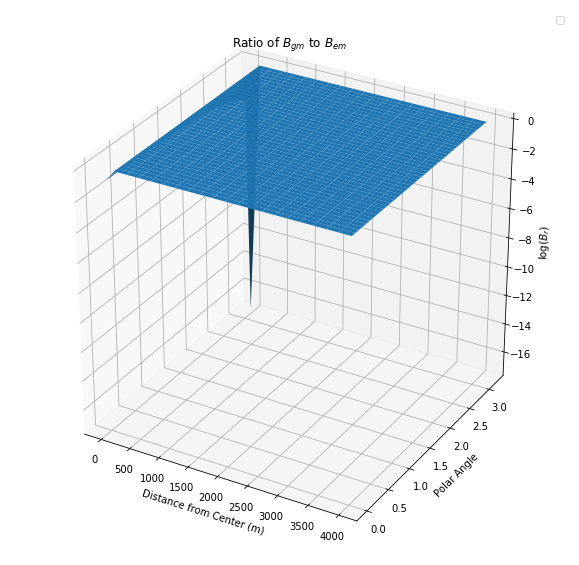

In [117]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.legend()
ax.plot_surface(X, Y, (log10Bsgmr-log10Bsemr))
ax.set_xlabel("Distance from Center (m)")
ax.set_title("Ratio of $B_{gm}$ to $B_{em}$")
ax.set_ylabel("Polar Angle")
ax.set_zlabel("log($B_r$)")

No handles with labels found to put in legend.
C:\Users\Grant\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axes3d.py:1784: RuntimeWarning: invalid value encountered in true_divide
  for n in normals])


Text(0.5,0,'log($B_{theta}$)')

C:\Users\Grant\Anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:141: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w
C:\Users\Grant\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


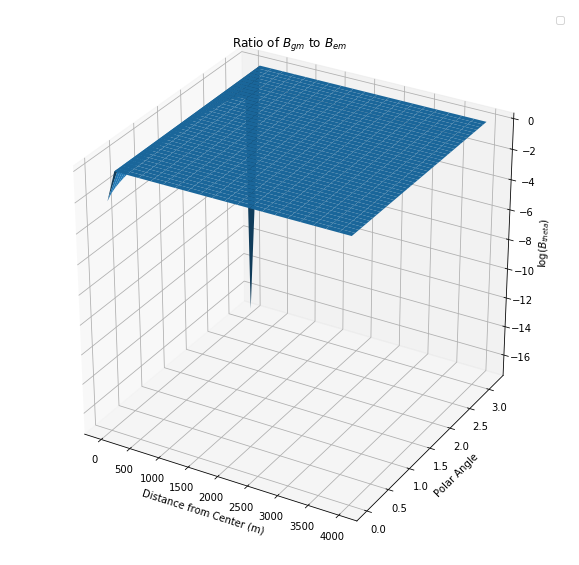

In [122]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.legend()
ax.plot_surface(X, Y, (log10Bsgmtheta-log10Bsemtheta))
ax.set_xlabel("Distance from Center (m)")
ax.set_title("Ratio of $B_{gm}$ to $B_{em}$")
ax.set_ylabel("Polar Angle")
ax.set_zlabel("log($B_{theta}$)")